# Unit 1: Exploratory Data Analysis on the MovieLens 100k Dataset

### The [MovieLens](https://grouplens.org/datasets/movielens/) datasets are for recommender systems practitioners and researchers what MNIST is to computer vision people. Of course, the MovieLens datasets are not the only public datasets used in the RecSys community, but the most popular. There are also the 1 Million Song Dataset, Amazon product review datasets, Criteo dataset, BookCrossings, etc.

On _kdnuggets_ you can find a [simple overview](https://www.kdnuggets.com/2016/02/nine-datasets-investigating-recommender-systems.html) of some of them.

There are different sizes determined by the number of movie ratings provided by a group of users. Take a look at the GroupLens website and explore them.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from recsys_training.data import Dataset, genres

In [3]:
ml100k_ratings_filepath = '../data/raw/ml-100k/u.data'
ml100k_item_filepath = '../data/raw/ml-100k/u.item'
ml100k_user_filepath = '../data/raw/ml-100k/u.user'

## Load Data

In [4]:
ratings = pd.read_csv(ml100k_ratings_filepath,
                      sep='\t',
                      header=None,
                      names=['user', 'item', 'rating', 'timestamp'],
                      engine='python')

In [5]:
items = pd.read_csv(ml100k_item_filepath, sep='|', header=None,
                    names=['item', 'title', 'release', 'video_release', 'imdb_url']+genres,
                    engine='python')

In [6]:
users = pd.read_csv(ml100k_user_filepath, sep='|', header=None,
                    names=['user', 'age', 'gender', 'occupation', 'zip'])

## Data Exploration

In this unit, we like to get a better picture of the data we use for making recommendations in the upcoming units. Therefore, let's have a look to some statistics to get confident with the data and algorithms.

**TODO:**
Let's find out the following:

* number of users
* number of items
* rating distribution
* user / item mean ratings
* popularity skewness
    * user rating count distribution
    * item rating count distribution
* time
* sparsity
* user / item features

### number of users

In [7]:
n_users = ratings['user'].unique().shape[0]
n_users

943

In [8]:
ratings['user'].unique().min()

1

In [9]:
ratings['user'].unique().max()

943

### number of items

In [10]:
n_items = ratings['item'].unique().shape[0]
n_items

1682

In [11]:
ratings['item'].unique().min()

1

In [12]:
ratings['item'].unique().max()

1682

### user rating distribution

In [13]:
ratings['rating'].value_counts().sort_index()

1     6110
2    11370
3    27145
4    34174
5    21201
Name: rating, dtype: int64

In [14]:
ratings['rating'].value_counts(normalize=True).sort_index()

1    0.06110
2    0.11370
3    0.27145
4    0.34174
5    0.21201
Name: rating, dtype: float64

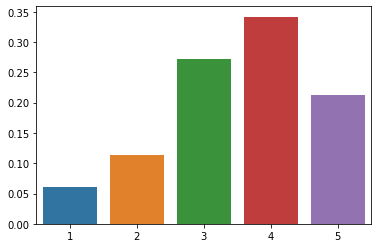

In [15]:
sns.barplot(x=ratings['rating'].value_counts(normalize=True).sort_index().index,
            y=ratings['rating'].value_counts(normalize=True).sort_index().values)

In [16]:
ratings['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

### user rating count distribution

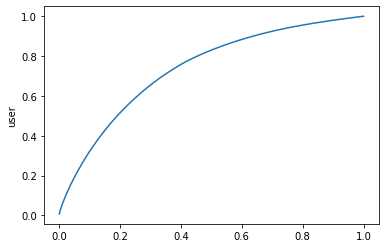

In [17]:
quantiles = ratings['user'].value_counts(normalize=True).cumsum()

sns.lineplot(np.arange(n_users)/n_users+1/n_users,
             quantiles)

### item rating count distribution

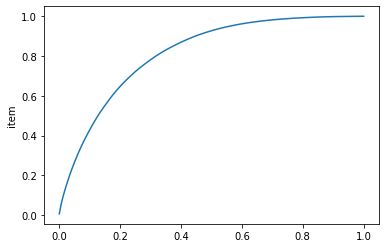

In [18]:
quantiles = ratings['item'].value_counts(normalize=True).cumsum()

sns.lineplot(np.arange(n_items)/n_items+1/n_items,
             quantiles)

### user mean ratings

In [19]:
user_mean_ratings = ratings[['user', 'rating']].groupby('user').mean().reset_index(drop=True)

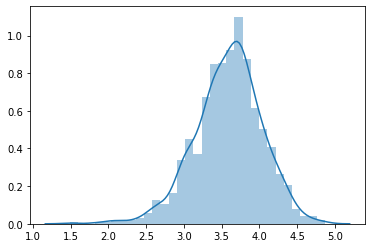

In [20]:
sns.distplot(user_mean_ratings)

### item mean ratings

In [21]:
item_mean_ratings = ratings[['item', 'rating']].groupby('item').mean().reset_index(drop=True)

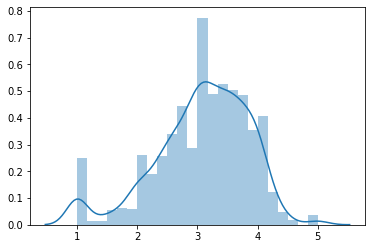

In [22]:
sns.distplot(item_mean_ratings)

### sparsity

In [23]:
n_users

943

In [24]:
n_items

1682

In [25]:
# count the uniquely observed ratings
observed_ratings = ratings[['user', 'item']].drop_duplicates().shape[0]
observed_ratings

100000

In [26]:
potential_ratings = n_users * n_items
potential_ratings

1586126

In [27]:
density = observed_ratings / potential_ratings

In [28]:
density

0.06304669364224531

In [29]:
sparsity = 1 - density

In [30]:
sparsity

0.9369533063577546